In [101]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Stats
from scipy.stats import chi2_contingency

warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
df = pd.read_excel('./BELIZE_DATI_BIN_OPHI.xlsx')

In [3]:
df.head()

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0


**Variables**

- **hh\_id (Household ID):** Uniquely identifies each household.
- **ind\_id (Individual ID):** Uniquely identifies individuals within households.
- **d\_cm (Child Mortality):** Indicates recent child mortality, where 0 signifies no under-18 child mortality in the last 5 years, and 1 indicates the opposite.
- **d\_nutr (Nutrition):** Flags households with malnourished individuals (0 = No, 1 = Yes).
- **d\_satt (School Attendance):** Reflects school attendance for all school-age children up to class 8 (0 = No, 1 = Yes).
- **d\_educ (Years of Schooling):** Marks households with at least one member having 6 years of education (0 = No, 1 = Yes).
- **d\_elect (Electricity):** Indicates households with electricity access (0 = No, 1 = Yes).
- **d\_wtr (Drinking Water):** Highlights access to drinking water meeting MDG standards, considering distance (0 = No, 1 = Yes).
- **d\_sani (Sanitation):** Flags households with improved sanitation meeting MDG standards (0 = No, 1 = Yes).
- **d\_hsg (Housing):** Identifies households with housing conditions meeting quality standards (0 = No, 1 = Yes).
- **d\_cklf (Cooking Fuel):** Flags households using cooking fuel meeting MDG standards (0 = No, 1 = Yes).
- **d\_asst (Assets):** Indicates ownership of assets like a car or more than one small asset, including a computer and an animal cart (0 = No, 1 = Yes).
- **miss (Missing Indicators):** Identifies individuals with at least one missing indicator (0 = No missing, 1 = At least one missing).
- **weighted\_sum (Weighted Indicators Sum):** Represents the sum of weighted indicator values (continuous scale).
- **multi\_deprived (Multidimensional Poverty):** Flags individuals considered multidimensionally poor based on the standard MPI second cut-off of 33.33% (0 = Not poor, 1 = Poor).


In [4]:
df.shape

(19257, 15)

In [5]:
df.columns

Index(['hh_id', 'ind_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
       'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'weighted_sum',
       'multi_poor'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hh_id         19257 non-null  int64  
 1   ind_id        19257 non-null  int64  
 2   d_cm          19098 non-null  float64
 3   d_nutr        18409 non-null  float64
 4   d_satt        19251 non-null  float64
 5   d_educ        19094 non-null  float64
 6   d_elct        19257 non-null  int64  
 7   d_wtr         19257 non-null  int64  
 8   d_sani        19257 non-null  int64  
 9   d_hsg         19250 non-null  float64
 10  d_ckfl        19257 non-null  int64  
 11  d_asst        19257 non-null  int64  
 12  miss          19257 non-null  int64  
 13  weighted_sum  18169 non-null  float64
 14  multi_poor    18169 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.2 MB


In [42]:
# 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'multi_poor'
for column in df.iloc[:, 2:-2].join(df.iloc[:, -1:]):
    df[column] = df[column].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hh_id         19257 non-null  int64   
 1   ind_id        19257 non-null  int64   
 2   d_cm          19098 non-null  category
 3   d_nutr        18409 non-null  category
 4   d_satt        19251 non-null  category
 5   d_educ        19094 non-null  category
 6   d_elct        19257 non-null  category
 7   d_wtr         19257 non-null  category
 8   d_sani        19257 non-null  category
 9   d_hsg         19250 non-null  category
 10  d_ckfl        19257 non-null  category
 11  d_asst        19257 non-null  category
 12  miss          19257 non-null  category
 13  weighted_sum  18169 non-null  float64 
 14  multi_poor    18169 non-null  category
dtypes: category(12), float64(1), int64(2)
memory usage: 678.6 KB


In [29]:
df.describe()

,hh_id,ind_id,weighted_sum
count,19257.000000,1.925700e+04,18169.000000
mean,11043.279015,1.103203e+07,0.079161
std,6486.814150,6.486737e+06,0.114116
min,101.000000,1.001010e+05,0.000000
25%,5122.000000,5.102202e+06,0.000000
50%,11220.000000,1.120200e+07,0.000000
75%,16710.000000,1.670101e+07,0.166667
max,21824.000000,2.180241e+07,0.722222


In [30]:
# Calculate the percentage of 1s, 0s, and NaN values for each variable
percentage_counts = {}
for col in df.iloc[:, 2:-2].join(df.iloc[:, -1:]):
    if pd.api.types.is_categorical_dtype(df[col]):
        counts = df[col].value_counts(normalize=True)
        percentage_counts[col] = {
            '1': counts.get(1, 0) * 100,
            '0': counts.get(0, 0) * 100,
            'NaN': df[col].isna().mean() * 100
        }

# Display the results
for col, counts in percentage_counts.items():
    print(f'\nVariable: {col}')
    print(f'Percentage of 1: {counts["1"]:.2f}%')
    print(f'Percentage of 0: {counts["0"]:.2f}%')
    print(f'Percentage of NaN: {counts["NaN"]:.2f}%')


Variable: d_cm
Percentage of 1: 3.73%
Percentage of 0: 96.27%
Percentage of NaN: 0.83%

Variable: d_nutr
Percentage of 1: 12.73%
Percentage of 0: 87.27%
Percentage of NaN: 4.40%

Variable: d_satt
Percentage of 1: 5.42%
Percentage of 0: 94.58%
Percentage of NaN: 0.03%

Variable: d_educ
Percentage of 1: 1.75%
Percentage of 0: 98.25%
Percentage of NaN: 0.85%

Variable: d_elct
Percentage of 1: 10.17%
Percentage of 0: 89.83%
Percentage of NaN: 0.00%

Variable: d_wtr
Percentage of 1: 4.86%
Percentage of 0: 95.14%
Percentage of NaN: 0.00%

Variable: d_sani
Percentage of 1: 13.41%
Percentage of 0: 86.59%
Percentage of NaN: 0.00%

Variable: d_hsg
Percentage of 1: 19.74%
Percentage of 0: 80.26%
Percentage of NaN: 0.04%

Variable: d_ckfl
Percentage of 1: 17.67%
Percentage of 0: 82.33%
Percentage of NaN: 0.00%

Variable: d_asst
Percentage of 1: 4.18%
Percentage of 0: 95.82%
Percentage of NaN: 0.00%

Variable: miss
Percentage of 1: 5.65%
Percentage of 0: 94.35%
Percentage of NaN: 0.00%

Variable: 

In [31]:
# Missing values
df.isnull().sum()

hh_id              0
ind_id             0
d_cm             159
d_nutr           848
d_satt             6
d_educ           163
d_elct             0
d_wtr              0
d_sani             0
d_hsg              7
d_ckfl             0
d_asst             0
miss               0
weighted_sum    1088
multi_poor      1088
dtype: int64

In [13]:
# Missing Values Percentage
df.isnull().sum()/len(df)*100

hh_id           0.000000
ind_id          0.000000
d_cm            0.825674
d_nutr          4.403593
d_satt          0.031158
d_educ          0.846445
d_elct          0.000000
d_wtr           0.000000
d_sani          0.000000
d_hsg           0.036350
d_ckfl          0.000000
d_asst          0.000000
miss            0.000000
weighted_sum    5.649894
multi_poor      5.649894
dtype: float64

The presented output displays the percentage of missing values for each variable in the dataset. Notably, the unique identifiers, `hh_id` and `ind_id`, exhibit no missing values, ensuring the integrity of household and individual identification. However, variables such as `d_nutr` and `d_educ` demonstrate relatively higher percentages of missing values, suggesting a need for cautious interpretation, especially considering their significance in measuring malnutrition and educational attainment. For variables like `d_satt` with minimal missing values, straightforward analysis may proceed without substantial concerns. Careful consideration of missing data is crucial to maintaining the robustness and reliability of subsequent analyses.

In [32]:
# Unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for hh_id: [  101   102   103 ... 21822 21823 21824]
Unique values for ind_id: [  100101   100102   100201 ... 21802404 21802405 21802406]
Unique values for d_cm: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_nutr: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_satt: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_educ: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_elct: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_wtr: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_sani: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_hsg: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_ckfl: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_asst: [0, 1]
Categories (2, int64): [0, 1]
Unique values for miss: [0, 1]
Categories (2, int64): [0, 1]
Unique values for weighted_sum: [0.         0.16666667 0.05555556 0.11111111 0.277777

### Distribution 

In [24]:
len(df['hh_id'].unique()), len(df['ind_id'].unique())

(4636, 19257)

In [33]:
df_hhid_distr = df.groupby('hh_id', as_index=False)['ind_id'].size()
df_hhid_distr = df_hhid_distr.rename(columns={'hh_id': 'hh_id', 'size': 'ind_id_count'})
df_hhid_distr

,hh_id,ind_id_count
0,101,2
1,102,1
2,103,4
3,104,5
4,105,6
...,...,...
4631,21820,5
4632,21821,10
4633,21822,3
4634,21823,6


In [34]:
ind_id_count_distr = df_hhid_distr.groupby('ind_id_count', as_index=False)['hh_id'].size()
ind_id_count_distr

,ind_id_count,size
0,1,604
1,2,619
2,3,769
3,4,860
4,5,675
5,6,439
6,7,276
7,8,173
8,9,85
9,10,53


In [38]:
ind_id_count_distr.sort_values(by='ind_id_count')

,ind_id_count,size
0,1,604
1,2,619
2,3,769
3,4,860
4,5,675
5,6,439
6,7,276
7,8,173
8,9,85
9,10,53


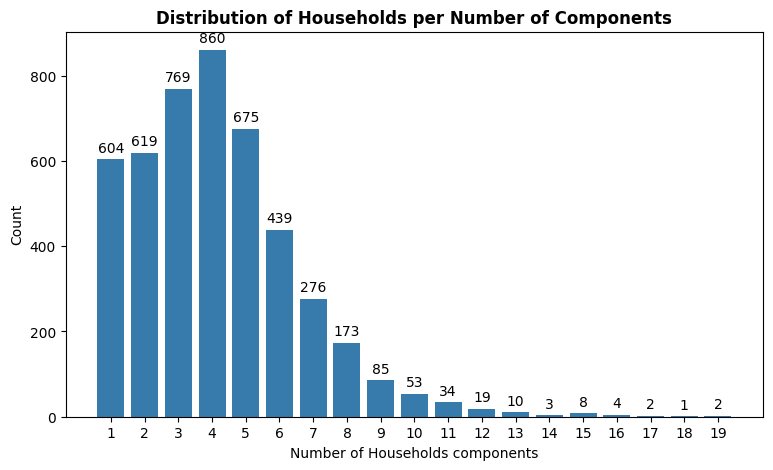

In [45]:
# Assuming your data is in a DataFrame named df
dfsort = pd.DataFrame({
    'ind_id_count': [604, 619, 769, 860, 675, 439, 276, 173, 85, 53, 34, 19, 10, 3, 8, 4, 2, 1, 2],
    'size': list(range(1, 20))
})

# Set the width of the bars
bar_width = 0.8  # Adjust this value to control the width of the bars

# Set the figsize for the entire figure
fig, ax = plt.subplots(figsize=(9,5))

# Create a bar plot with more space between bars
ax.bar(dfsort['size'], dfsort['ind_id_count'], width=bar_width, color=sns.color_palette("Blues_d")[-3])

# Add value labels on top of each bar
for i, value in enumerate(dfsort['ind_id_count']):
    ax.text(dfsort['size'][i], value + 10, str(value), ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Number of Households components')
ax.set_ylabel('Count')
ax.set_title('Distribution of Households per Number of Components' , fontweight='bold')

# Adjust x-axis ticks and labels to center bars
ax.set_xticks(dfsort['size'])
ax.set_xticklabels(dfsort['size'], ha='center')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust this value to control the space between bars

# Show the plot
plt.show()


There are 4636 households and 

## Visualizations

In [30]:
def bar_plot_categorical(variable: pd.core.series.Series, variable_name:str):
    
    # Assuming df is your DataFrame
    sns.set(style="whitegrid")

    # Calculate the percentage distribution
    percentage_d_cm = variable.value_counts(normalize=True) * 100

    # Create a bar plot
    ax = sns.barplot(x=percentage_d_cm.index, y=percentage_d_cm.values, palette="Blues_d")

    # Adding percentage values on top of the bars
    for i, value in enumerate(percentage_d_cm):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

    # Adding labels and manually setting the title to bold
    ax.set(xlabel=variable_name, ylabel='Percentage (%)')
    ax.set_title(f'Percentage Distribution of {variable_name}', fontweight='bold')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    return

In [122]:
def bar_plot_categorical_subplot(variables: list, variable_names: list):
    # Assuming df is your DataFrame
    sns.set(style="whitegrid")
    
    # Calculate the number of rows and columns for the subplots
    rows = len(variables) // 4 + len(variables) % 4
    cols = 4

    # Set up the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(16, 13.5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each variable and create a bar plot
    for i, (variable, variable_name) in enumerate(zip(variables, variable_names)):
        # Calculate the percentage distribution
        percentage_distribution = variable.value_counts(normalize=True) * 100

        # Create a bar plot
        ax = sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette="Blues_d", ax=axes[i])

        # Adding percentage values on top of the bars
        for j, value in enumerate(percentage_distribution):
            ax.text(j, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

        # Set labels and title for each subplot
        ax.set(xlabel=variable_name, ylabel='Percentage (%)')
        ax.set_title(f'Percentage Distribution of {variable_name}', fontweight='bold', y=1.05)
    
    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [46]:
df.columns

Index(['hh_id', 'ind_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
       'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'weighted_sum',
       'multi_poor'],
      dtype='object')

In [48]:
# Example usage
variables = [df['d_cm'], df['d_nutr'], df['d_satt'], df['d_educ'], df['d_elct'],
             df['d_wtr'], df['d_sani'], df['d_hsg'], df['d_ckfl'], df['d_asst'],
             df['miss'], df['multi_poor']]

variable_names = ['d_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
                  'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
                  'miss', 'multi_poor']

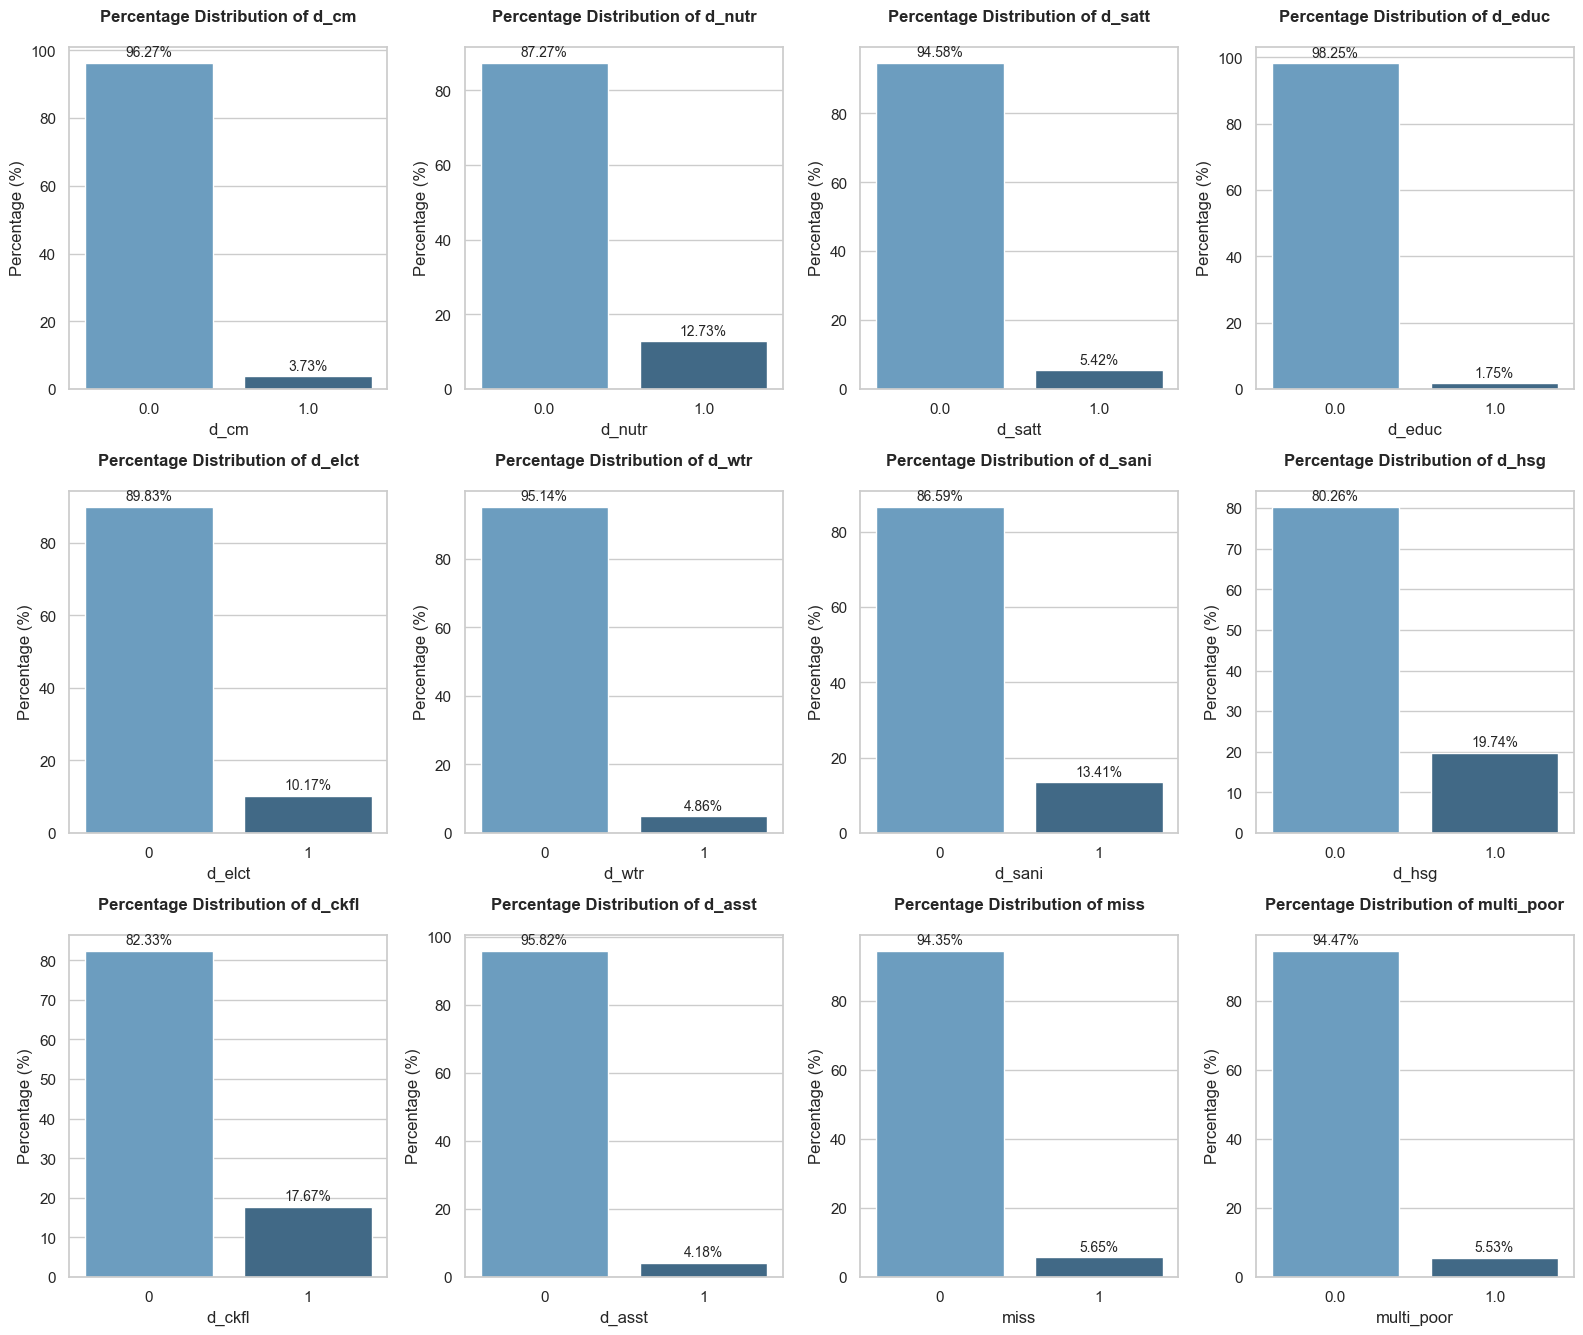

In [123]:
bar_plot_categorical_subplot(variables, variable_names)

In [65]:
print(f'Number of observations in df: {len(df)}')
print(f'Number of observation in df with at least one missing value: {round(len(df)*0.0565)}')
print(f'Number of observation in df without missing values: {len(df) - round(len(df)*0.0565)}')

Number of observations in df: 19257
Number of observation in df with at least one missing value: 1088
Number of observation in df without missing values: 18169


For further analysis I can exlcude the number of rows with at least one missing value.

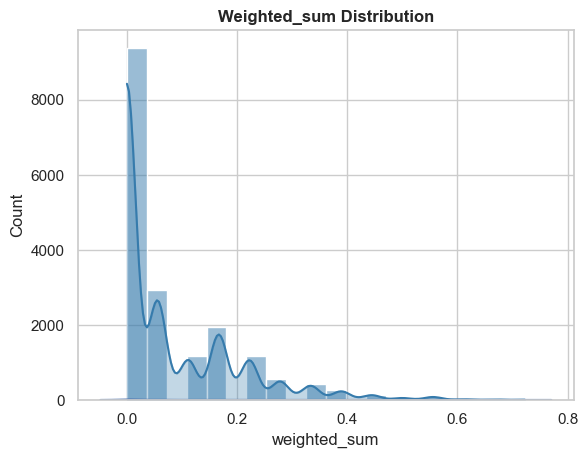

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a continuous variable
sns.histplot(df['weighted_sum'], bins=20, kde=True, color=sns.color_palette("Blues_d")[-3])

# Extracting the values from the KDE plot to fill the area underneath
x, y = sns.kdeplot(df['weighted_sum'], fill=False).get_lines()[0].get_data()

# Filling the area underneath the curve with a darker blue
plt.fill_between(x, y, color=sns.color_palette("Blues_d")[-3], alpha=0.3)

plt.title("Weighted_sum Distribution", fontweight='bold')

plt.show()



## Analysis

Remove rows without missing values. Maybe let's consider before to calculate the weighted values for weighted_sum

In [70]:
df.head()

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0


In [71]:
len(df)

19257

In [83]:
df[df['weighted_sum'].isnull()]

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
192,308,300801,0.0,NaN,0.0,0.0,0,0,0,0.0,0,0,1,NaN,NaN
193,308,300802,0.0,NaN,0.0,0.0,0,0,0,0.0,0,0,1,NaN,NaN
194,308,300803,0.0,NaN,0.0,0.0,0,0,0,0.0,0,0,1,NaN,NaN
248,404,400401,0.0,NaN,0.0,0.0,0,0,0,0.0,0,0,1,NaN,NaN
249,404,400402,0.0,NaN,0.0,0.0,0,0,0,0.0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,20514,20501405,0.0,NaN,0.0,0.0,0,0,0,0.0,1,0,1,NaN,NaN
17876,20514,20501406,0.0,NaN,0.0,0.0,0,0,0,0.0,1,0,1,NaN,NaN
17877,20514,20501407,0.0,NaN,0.0,0.0,0,0,0,0.0,1,0,1,NaN,NaN
17878,20514,20501408,0.0,NaN,0.0,0.0,0,0,0,0.0,1,0,1,NaN,NaN


In [84]:
missing_weighted_sum = df[df['weighted_sum'].isnull()]

# Check if all rows in missing_weighted_sum have at least one other missing value
all_rows_have_other_missing = missing_weighted_sum.drop('weighted_sum', axis=1).isnull().any(axis=1).all()

if all_rows_have_other_missing:
    print("All rows with missing 'weighted_sum' have at least one other missing value.")
else:
    print("There are rows with missing 'weighted_sum' that have no other missing values.")

All rows with missing 'weighted_sum' have at least one other missing value.


In [82]:
df[df['weighted_sum'].isnull()].groupby('miss').size()

miss
0       0
1    1088
dtype: int64

All rows with `weighted_sum` have at least one other missing value. The only thing I can do, considering also that the rows with at least missing data are only 5% of the entire dataset, is to delete this information and continue the analysis with a full dataset without missing values. 

In [78]:
df.isnull().sum()

hh_id              0
ind_id             0
d_cm             159
d_nutr           848
d_satt             6
d_educ           163
d_elct             0
d_wtr              0
d_sani             0
d_hsg              7
d_ckfl             0
d_asst             0
miss               0
weighted_sum    1088
multi_poor      1088
dtype: int64

In [88]:
df_nomiss = df[df['miss'] != 1]
df_nomiss = df_nomiss.drop('miss', axis=1)
df_nomiss

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19252,21824,21802402,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
19253,21824,21802403,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
19254,21824,21802404,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
19255,21824,21802405,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0


In [89]:
df_nomiss.isnull().sum()

hh_id           0
ind_id          0
d_cm            0
d_nutr          0
d_satt          0
d_educ          0
d_elct          0
d_wtr           0
d_sani          0
d_hsg           0
d_ckfl          0
d_asst          0
weighted_sum    0
multi_poor      0
dtype: int64

In [92]:
df_nomiss.dtypes

hh_id              int64
ind_id             int64
d_cm            category
d_nutr          category
d_satt          category
d_educ          category
d_elct          category
d_wtr           category
d_sani          category
d_hsg           category
d_ckfl          category
d_asst          category
weighted_sum     float64
multi_poor      category
dtype: object

### Correlation

In [86]:

# Example binary variables
binary_var1 = [0, 1, 0, 1, 0, 1, 0, 1]
binary_var2 = [1, 0, 1, 0, 1, 0, 1, 0]

# Calculate point-biserial correlation coefficient
correlation_coefficient, p_value = pointbiserialr(binary_var1, binary_var2)

print(f"Point-biserial correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Point-biserial correlation coefficient: -0.9999999999999999
P-value: 0.0


In [95]:
df_nomiss.select_dtypes(include='category')

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19252,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
19253,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
19254,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
19255,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0


In [98]:
df_binary_categorical = df_nomiss.select_dtypes(include='category')
df_binary_categorical

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19252,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
19253,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
19254,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
19255,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0


<Axes: title={'center': 'Phi Correlation Plot between Binary Variables'}>

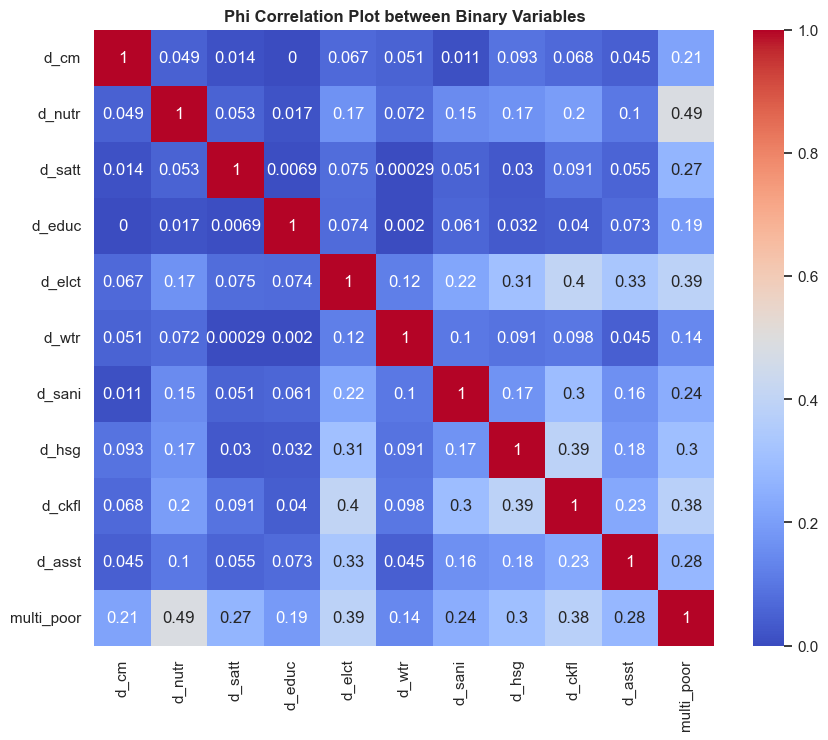

In [106]:
# Function to calculate the Phi coefficient
def calculate_phi_coefficient(var1, var2):
    confusion_matrix = pd.crosstab(var1, var2)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi_coefficient = np.sqrt(chi2 / n)
    return phi_coefficient

# Create a matrix of Phi coefficients
num_vars = df_binary_categorical.shape[1]
phi_matrix = np.zeros((num_vars, num_vars))

for i in range(num_vars):
    for j in range(num_vars):
        phi_matrix[i, j] = calculate_phi_coefficient(df_binary_categorical.iloc[:, i], df_binary_categorical.iloc[:, j])

# Create a DataFrame from the Phi matrix
phi_df = pd.DataFrame(phi_matrix, columns=df_binary_categorical.columns, index=df_binary_categorical.columns)

plt.figure(figsize=(10, 8))
plt.title("Phi Correlation Plot between Binary Variables", fontweight='bold')

# Create a corrplot using seaborn
sns.heatmap(phi_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)


In [107]:
phi_df

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
d_cm,0.999246,0.049037,0.014088,0.000000,0.067341,0.050864,0.010921,0.092819,0.067700,0.044860,0.212262
d_nutr,0.049037,0.999754,0.052903,0.017097,0.165298,0.071773,0.151022,0.166247,0.197704,0.102510,0.488032
d_satt,0.014088,0.052903,0.999451,0.006901,0.074891,0.000294,0.051461,0.030248,0.091108,0.055039,0.266080
d_educ,0.000000,0.017097,0.006901,0.998400,0.073978,0.002005,0.061498,0.031641,0.039620,0.073190,0.188952
d_elct,0.067341,0.165298,0.074891,0.073978,0.999698,0.118417,0.220837,0.307800,0.404831,0.329270,0.387099
d_wtr,0.050864,0.071773,0.000294,0.002005,0.118417,0.999405,0.102008,0.091079,0.098128,0.045483,0.142803
d_sani,0.010921,0.151022,0.051461,0.061498,0.220837,0.102008,0.999772,0.169191,0.295526,0.161912,0.243000
d_hsg,0.092819,0.166247,0.030248,0.031641,0.307800,0.091079,0.169191,0.999829,0.389934,0.180023,0.303748
d_ckfl,0.067700,0.197704,0.091108,0.039620,0.404831,0.098128,0.295526,0.389934,0.999816,0.230277,0.377169
d_asst,0.044860,0.102510,0.055039,0.073190,0.329270,0.045483,0.161912,0.180023,0.230277,0.999274,0.276818


The provided correlation matrix represents the pairwise correlations between binary variables in your dataset. Here are some comments on the matrix:

- **d_cm (Child Mortality):**
  - Correlation with other variables is generally low, except for a moderate correlation with `multi_poor` (0.21), indicating a notable connection between child mortality and multidimensional poverty.

- **d_nutr (Nutrition):**
  - There is a relatively low correlation with other variables, but a higher correlation with `multi_poor` (0.49), suggesting a stronger association between malnutrition and multidimensional poverty.

- **d_satt (School Attendance):**
  - Most correlations are low, indicating weak relationships with other variables. There is a moderate correlation with `multi_poor` (0.27), implying a connection between school attendance and multidimensional poverty.

- **d_educ (Years of Schooling):**
  - Shows very low correlations with other variables, indicating weak linear relationships.

- **d_elct (Electricity):**
  - Moderate to high correlations with several variables, particularly with `d_ckfl` (0.40), `d_asst` (0.33), and `multi_poor` (0.39), suggesting connections between electricity access, cooking fuel, asset ownership, and multidimensional poverty.

- **d_wtr (Drinking Water):**
  - Low to moderate correlations with other variables, with the highest correlation observed with `d_ckfl` (0.12).

- **d_sani (Sanitation):**
  - Moderately correlated with `d_elct` (0.22) and `d_asst` (0.24), indicating potential associations between sanitation, electricity, asset ownership, and multidimensional poverty.

- **d_hsg (Housing):**
  - Moderate to high correlations with several variables, especially with `d_ckfl` (0.39), `d_asst` (0.30), and `multi_poor` (0.30), suggesting links between housing conditions, cooking fuel, asset ownership, and multidimensional poverty.

- **d_ckfl (Cooking Fuel):**
  - Moderate to high correlations observed, particularly with `d_elct` (0.40), `d_wtr` (0.12), `d_hsg` (0.39), and `d_asst` (0.23).

- **d_asst (Assets):**
  - Moderate correlations with `d_elct` (0.33), `d_hsg` (0.30), `d_ckfl` (0.23), and `multi_poor` (0.28), suggesting connections between asset ownership, electricity, housing, cooking fuel, and multidimensional poverty.

- **multi_poor (Multidimensional Poverty):**
  - Shows moderate to high correlations with several variables, reflecting the multidimensional nature of poverty. Notable correlations include `d_cm` (0.21), `d_nutr` (0.49), `d_satt` (0.27), `d_elct` (0.39), `d_hsg` (0.30), and `d_ckfl` (0.38).

These correlations provide insights into potential relationships between different dimensions of poverty in your dataset.